<a href="https://colab.research.google.com/github/xpertdesh/ml-class21/blob/main/labs/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Clustering


## Supervised vs Unsupervised learning

Up until now we have been focusing on supervised learning. In supervised learning our training set consists of labeled data. For example, we have images and each image has an associated  label: dog, cat, elephant. And from this labeled data our model is trying to learn how to predict the label from the features. 

Unsupervised learning is trying to learn patterns from unlabeled data, and one set of models has to do with segmenting a dataset into clusters or groups of related data.

![](https://cambridge-intelligence.com/wp-content/uploads/2016/01/clustering-animated.gif)

We will cover two main clustering techniques.

Let's explore this with a small dog breed dataset.

First, we will load the dataset:

In [1]:
import pandas as pd
dog_data = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning-notebooks/master/data/dogbreeds.csv')
dog_data = dog_data.set_index('breed')

In [4]:
dog_data

,height (inches),weight (pounds)
breed,,
Border Collie,20,45
Boston Terrier,16,20
Brittany Spaniel,18,35
Bullmastiff,27,120
Chihuahua,8,8
German Shepherd,25,78
Golden Retreiver,23,70
Great Dane,32,160
Portuguese Water Dog,21,50


Looking at the values in the height and weight columns it looks like we should normalize the data.

<img src="http://animalfair.com/wp-content/uploads/2014/08/chihuahua-and-great-dane.jpg" width="700"/>


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dog_data[['height (inches)', 'weight (pounds)']] =  scaler.fit_transform(dog_data[['height (inches)', 'weight (pounds)']] )
dog_data

,height (inches),weight (pounds)
breed,,
Border Collie,0.538462,0.248366
Boston Terrier,0.384615,0.084967
Brittany Spaniel,0.461538,0.183007
Bullmastiff,0.807692,0.738562
Chihuahua,0.076923,0.006536
German Shepherd,0.730769,0.464052
Golden Retreiver,0.653846,0.411765
Great Dane,1.000000,1.000000
Portuguese Water Dog,0.576923,0.281046


And let's visualize that data:

In [14]:
import bokeh.plotting as bpl


bpl.output_notebook()
source = bpl.ColumnDataSource(dog_data)
x = bpl.figure(title="Plot of Dog Breeds",
            x_axis_label="Normalized Weight", y_axis_label="Normalized Height")
x.scatter(x='weight (pounds)', y='height (inches)', source=source)

bpl.show(x)

Gazing at the scatter plot, it looks like we could group the data into three clusters. There are the 2 data points on the bottom left (*Chihuahua* and *Yorkshire Terrier*) The top right group of two (*Bull Mastiff* and *Great Dane*) and the middle group with all the other breeds. 


## My book
![](http://zacharski.org/wp-content/uploads/2010/02/cover.png)

Years ago I wrote a book on machine learning.The English version is free, and [the Chinese version is available on Amazon](https://www.amazon.com/%E5%86%99%E7%BB%99%E7%A8%8B%E5%BA%8F%E5%91%98%E7%9A%84%E6%95%B0%E6%8D%AE%E6%8C%96%E6%8E%98%E5%AE%9E%E8%B7%B5%E6%8C%87%E5%8D%97%EF%BC%88%E5%BC%82%E6%AD%A5%E5%9B%BE%E4%B9%A6%EF%BC%89-Chinese-Ron-Zacharski-%E6%89%8E%E5%93%88%E5%B0%94%E6%96%AF%E5%9F%BA-ebook/dp/B01ASYWU2I/ref=sr_1_6?dchild=1&keywords=zacharski&qid=1617035941&sr=8-6). The field has changed so much that most of the book is out of date. However [the general explanation of clustering](http://guidetodatamining.com/assets/guideChapters/DataMining-ch8.pdf) in the related chapter still is current and instead of repeating that here just read the material at the link. The book has the algorithms implemented from scratch but now these algorithms are available in sklearn:


## k means clustering

Let's divide our dog dataset into 3 clusters:


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, ).fit(dog_data)
labels = kmeans.labels_

The variable `labels` is an array the specifies which group each dog belongs to:

In [16]:
labels

array([0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

My results were:

    array([0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2], dtype=int32)

which indicates that the first, second, and third dogs are in group 0, the next one in group 1 and so on  That may be helpful for future computational tasks but is not the helpful if we are trying to visualize the data. Let me munge that a bit into a slightly more useful form:

In [17]:
groups = {0: [], 1: [], 2: []}
i = 0
for index, row in dog_data.iterrows():
    groups[labels[i]].append(index)
    i += 1
## Now I will print it in a nice way:

for key, value in groups.items():
    print ('CLUSTER %i' % key)
    for breed in value:
        print("    %s" % breed)
    print('\n')

CLUSTER 0
    Border Collie
    Boston Terrier
    Brittany Spaniel
    German Shepherd
    Golden Retreiver
    Portuguese Water Dog
    Standard Poodle


CLUSTER 1
    Bullmastiff
    Great Dane


CLUSTER 2
    Chihuahua
    Yorkshire Terrier




keep in mind that since they initial centroids are selected somewhat randomly it is possible that you get a different answer than I do. The answer I got was:

    CLUSTER 0
        Border Collie
        Boston Terrier
        Brittany Spaniel
        German Shepherd
        Golden Retreiver
        Portuguese Water Dog
        Standard Poodle
    

    CLUSTER 1
        Bullmastiff
        Great Dane


    CLUSTER 2
        Chihuahua
        Yorkshire Terrier


## Hierarchical Clustering

For the basics on hierarchical clustering consult [the fine chapter I mentioned](http://guidetodatamining.com/assets/guideChapters/DataMining-ch8.pdf). Here is how to do hierarchical clustering in sklearn.

In [18]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusterer.fit(dog_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

we can get the highest level division by viewing the `.labels_`:


In [19]:
clusterer.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

So here the first dog breed, Border Collie belongs to cluster 0. Keep in mind that in kmeans there is a random element--the selection of the initial centroids, but in hierarchical clustering there is no randomness so you should get the exact same answer I do. so that is the high level division but the hierarchical clustering algorithm constructs a tree - specifically, a dendrogram. To view that requires some imagination.  I can print a representation of the tree by:

In [20]:
import itertools
ii = itertools.count(dog_data.shape[0])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in clusterer.children_]

[{'left': 0, 'node_id': 11, 'right': 8},
 {'left': 4, 'node_id': 12, 'right': 10},
 {'left': 5, 'node_id': 13, 'right': 6},
 {'left': 1, 'node_id': 14, 'right': 2},
 {'left': 9, 'node_id': 15, 'right': 11},
 {'left': 14, 'node_id': 16, 'right': 15},
 {'left': 3, 'node_id': 17, 'right': 7},
 {'left': 13, 'node_id': 18, 'right': 16},
 {'left': 12, 'node_id': 19, 'right': 18},
 {'left': 17, 'node_id': 20, 'right': 19}]

The first line `{'left': 0, 'node_id': 11, 'right': 8}` reads that we combine cluster 0 *Border Collie* with cluster 8 *Portuguese Water Dog* to create Cluster 11. The next line says we  combine 4 *Chihuahua* with 10 *Yorkshire Terrier* to create cluster 12.  Let's associate index numbers with the dog breed names so that structure is easier to parse:


In [21]:
dog_names = pd.DataFrame({'breeds': dog_data.index.values})
dog_names

,breeds
0,Border Collie
1,Boston Terrier
2,Brittany Spaniel
3,Bullmastiff
4,Chihuahua
5,German Shepherd
6,Golden Retreiver
7,Great Dane
8,Portuguese Water Dog
9,Standard Poodle


That makes it easier to interpret lines like:

    {'left': 1, 'node_id': 14, 'right': 2},
    
We are combining `1` *Boston Terrier* and `2` *Brittany Spaniel*

So when we draw this out we get:

<img src="http://zacharski.org/files/courses/cs419/dendro.png" width="700"/>


<h1 style="color:red">Tasks</h1>

<h2 style="color:red">Task 1: Breakfast Cereals</h2>
I would like you to create 4 clusters of the data in:

    https://raw.githubusercontent.com/zacharski/pg2dm-python/master/data/ch8/cereal.csv
    
For clustering use the features calories, sugar, protein, and fiber.

Print out the results as we did for the dog breed data:


    CLUSTER 0
    Bullmastiff
    Great Dane
    

    CLUSTER 1
        Chihuahua
        Yorkshire Terrier
    

    CLUSTER 2
        Border Collie
        Boston Terrier
        Brittany Spaniel
        German Shepherd
        Golden Retreiver
        Portuguese Water Dog
        Standard Poodle
        
Because the initial centroids are random, by default the sklearn kmeans agorithm runs the algorithm 10 times and picks the best results (based on some of squares error). I would like you to change that parameter so it runs the algorithm 100 times.   Just google `sklearn kmeans` to get documentation on the parameters.

In [35]:
import pandas as pd
cereals = pd.read_csv('https://raw.githubusercontent.com/zacharski/pg2dm-python/master/data/ch8/cereal.csv', index_col='Name')
cereals = cereals[['Calories', 'Protein', 'dietary fiber (g)', 'sugar']]
cereals

,Calories,Protein,dietary fiber (g),sugar
Name,,,,
100% Bran,70,4,10.0,6
100% Natural Bran,120,3,2.0,8
All-Bran,70,4,9.0,5
All-Bran with Extra Fiber,50,4,14.0,0
Almond Delight,110,2,1.0,8
...,...,...,...,...
Triples,110,2,0.0,3
Trix,110,1,0.0,12
Wheat Chex,100,3,3.0,3


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cereals[['Calories', 'Protein', 'dietary fiber (g)', 'sugar']] =  scaler.fit_transform(cereals[['Calories', 'Protein', 'dietary fiber (g)', 'sugar']] )
cereals

,Calories,Protein,dietary fiber (g),sugar
Name,,,,
100% Bran,0.181818,0.6,0.714286,0.4375
100% Natural Bran,0.636364,0.4,0.142857,0.5625
All-Bran,0.181818,0.6,0.642857,0.3750
All-Bran with Extra Fiber,0.000000,0.6,1.000000,0.0625
Almond Delight,0.545455,0.2,0.071429,0.5625
...,...,...,...,...
Triples,0.545455,0.2,0.000000,0.2500
Trix,0.545455,0.0,0.000000,0.8125
Wheat Chex,0.454545,0.4,0.214286,0.2500


In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=100).fit(cereals)
labels = kmeans.labels_

In [38]:
labels

array([1, 0, 1, 1, 3, 3, 3, 0, 2, 2, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 3, 3, 2, 0, 0, 3, 3, 3, 2, 2, 2, 3, 0, 3, 2, 0, 2, 2, 3, 2,
       0, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       3, 1, 2, 2, 0, 2, 2, 3, 2, 2, 3], dtype=int32)

In [39]:
groups = {0: [], 1: [], 2: [], 3: []}
i = 0
for index, row in cereals.iterrows():
    groups[labels[i]].append(index)
    i += 1
## Now I will print it in a nice way:

for key, value in groups.items():
    print ('CLUSTER %i' % key)
    for breed in value:
        print("    %s" % breed)
    print('\n')

CLUSTER 0
    100% Natural Bran
    Basic 4
    Fruit & Fibre
    Fruitful Bran
    Honey Nut Cheerios
    Just Right Fruit & Nut
    Muesli Raisins & Almonds
    Muesli Peaches & Pecans
    Mueslix Crispy Blend
    Nutri-Grain Almond-Raisin
    Oatmeal Raisin Crisp
    Post Nat. Raisin Bran
    Raisin Bran
    Total Raisin Bran


CLUSTER 1
    100% Bran
    All-Bran
    All-Bran with Extra Fiber
    Cheerios
    Quaker Oatmeal
    Special K


CLUSTER 2
    Bran Chex
    Bran Flakes
    Clusters
    Corn Chex
    Corn Flakes
    Cracklin' Oat Bran
    Cream of Wheat (Quick)
    Crispix
    Double Chex
    Frosted Mini-Wheats
    Grape Nuts Flakes
    Grape-Nuts
    Great Grains Pecan
    Just Right Crunchy  Nuggets
    Kix
    Life
    Maypo
    Multi-Grain Cheerios
    Nutri-grain Wheat
    Product 19
    Puffed Rice
    Puffed Wheat
    Quaker Oat Squares
    Raisin Nut Bran
    Raisin Squares
    Rice Chex
    Rice Krispies
    Shredded Wheat
    Shredded Wheat 'n'Bran
    Shredded 


<h2 style="color:red">Task 2: Hierarchical</h2>
I would like you to use the hierarchical clustering algorithm on the cereal data.


In [40]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusterer.fit(cereals)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [41]:
clusterer.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [43]:
import itertools
ii = itertools.count(cereals.shape[0])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in clusterer.children_]

[{'left': 71, 'node_id': 77, 'right': 74},
 {'left': 75, 'node_id': 78, 'right': 77},
 {'left': 41, 'node_id': 79, 'right': 56},
 {'left': 15, 'node_id': 80, 'right': 40},
 {'left': 62, 'node_id': 81, 'right': 80},
 {'left': 69, 'node_id': 82, 'right': 81},
 {'left': 72, 'node_id': 83, 'right': 82},
 {'left': 4, 'node_id': 84, 'right': 76},
 {'left': 28, 'node_id': 85, 'right': 58},
 {'left': 44, 'node_id': 86, 'right': 45},
 {'left': 29, 'node_id': 87, 'right': 73},
 {'left': 14, 'node_id': 88, 'right': 18},
 {'left': 6, 'node_id': 89, 'right': 24},
 {'left': 17, 'node_id': 90, 'right': 25},
 {'left': 64, 'node_id': 91, 'right': 65},
 {'left': 26, 'node_id': 92, 'right': 59},
 {'left': 37, 'node_id': 93, 'right': 87},
 {'left': 1, 'node_id': 94, 'right': 7},
 {'left': 12, 'node_id': 95, 'right': 31},
 {'left': 47, 'node_id': 96, 'right': 60},
 {'left': 21, 'node_id': 97, 'right': 83},
 {'left': 0, 'node_id': 98, 'right': 2},
 {'left': 8, 'node_id': 99, 'right': 68},
 {'left': 10, 'nod

In [44]:
cereal_names = pd.DataFrame({'cereals': cereals.index.values})
cereal_names

,cereals
0,100% Bran
1,100% Natural Bran
2,All-Bran
3,All-Bran with Extra Fiber
4,Almond Delight
...,...
72,Triples
73,Trix
74,Wheat Chex
75,Wheaties


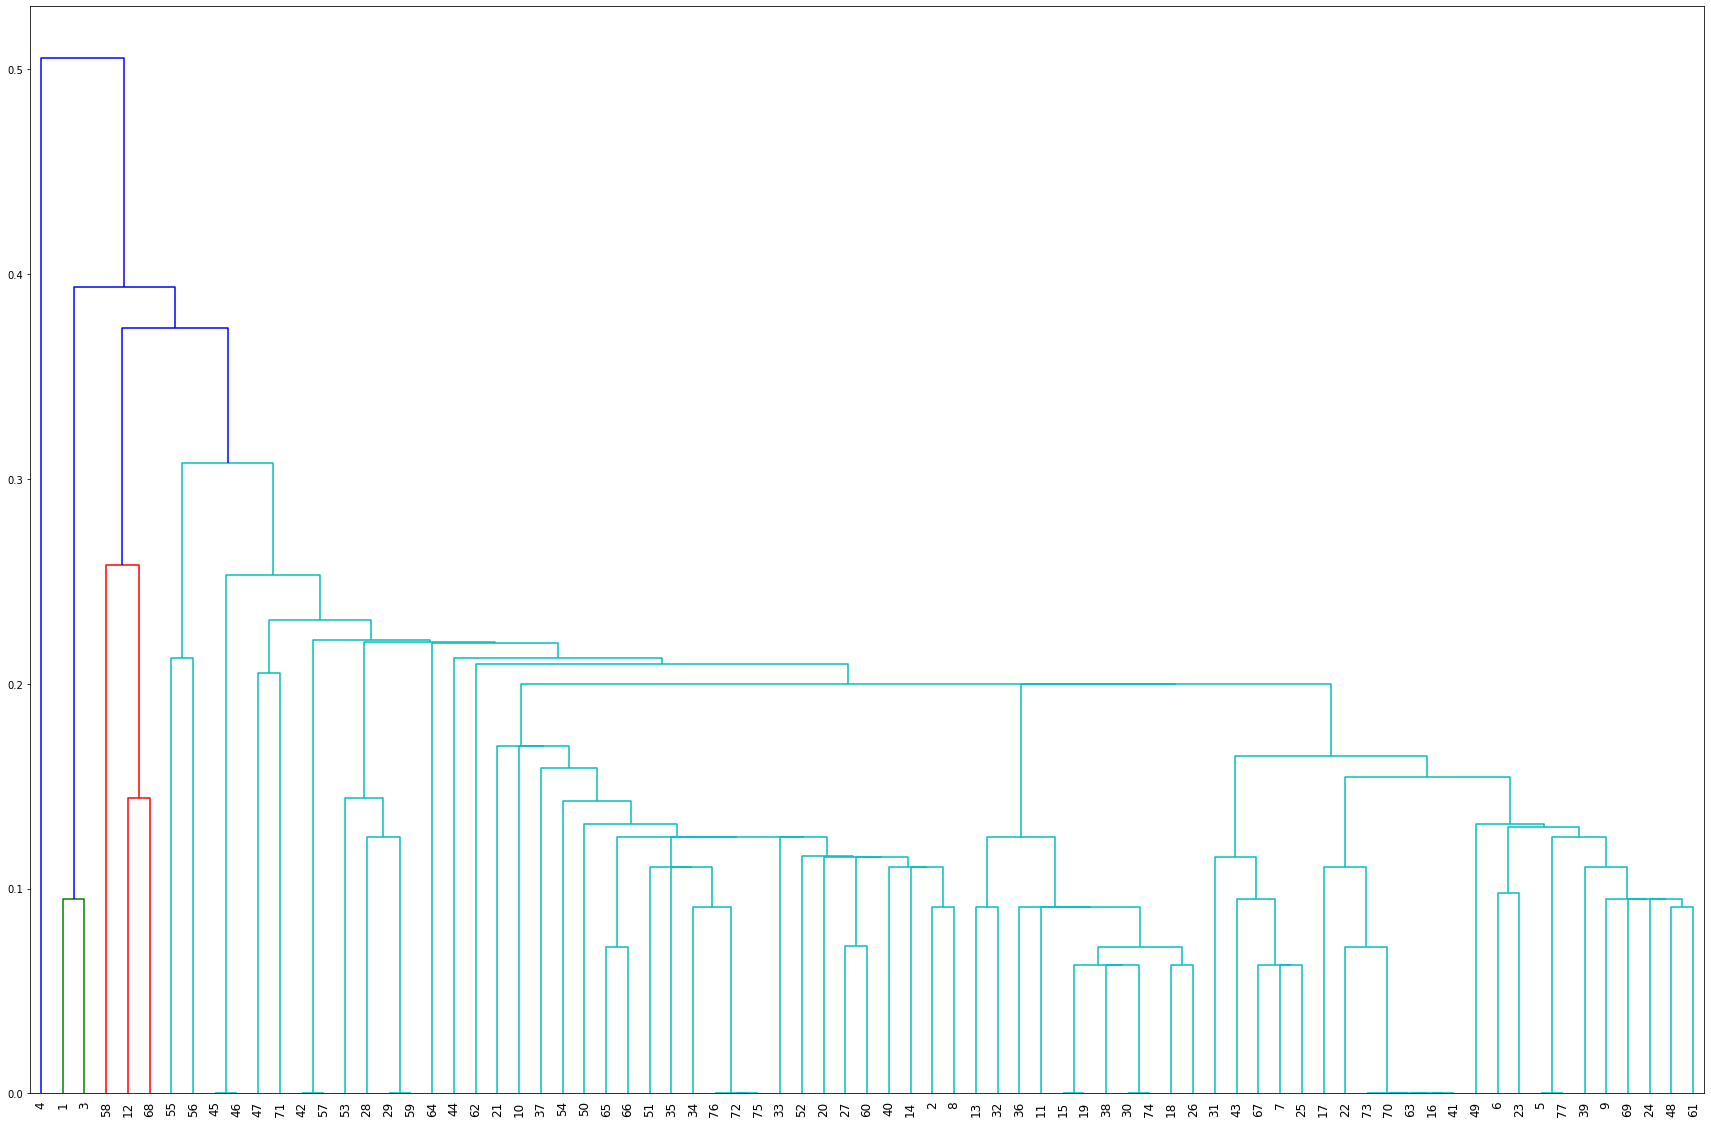

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = cereals.to_numpy()

linked = linkage(X, 'single')

labelList = range(1, 78)

plt.figure(figsize=(30, 20))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True, 
           leaf_font_size=12)
plt.show()

And here is a question. What clusters with *Fruity Pebbles*?

In [57]:
cereal_names[cereal_names['cereals'] == 'Fruity Pebbles']

,cereals
29,Fruity Pebbles


In [72]:
cereal_names.iloc[73]

cereals    Trix
Name: 73, dtype: object

In [71]:
cereal_names.iloc[37]

cereals    Honey-comb
Name: 37, dtype: object

##Fruity Pebbles clusters with Trix and Honey-Combs

## A non-programming question

The following is a table of the weights of some world-class female athletes.


name | weight in pounds
:--- | ---:
Asuka Teramoto	|	66
Linlin Deng	 |	68
Rebecca Tunney	|	76
Helalia Johannes	|	99
Kara Goucher	|	123
Brittainey Raven |	162
Jennifer Lacy	|	175
Nakia Sanford	|	200
Chen Nan	|	204


In Single Linkage Hierarchical Clustering, what is the first cluster made?


Note: You can indicate hiearchies with sub-lists: 

```
  [['acoustic guitar', 'electric guitar'], 'dobro']
```




In [ ]:
athletes = ['Asuka Teramoto', 'Linlin Deng', 'Rebecca Tunney', 'Helalia Johannes', 'Kara Goucher', 'Brittainey Raven', 'Jennifer Lacy', 'Nakia Sanford', 'Chen Nan']

first_cluster = [['Asuka Teramoto', 'Linlin Deng', 'Rebecca Tunney'],
                 ['Helalia Johannes', 'Kara Goucher', 'Brittainey Raven', 'Jennifer Lacy'],
                 ['Nakia Sanford', 'Chen Nan']]

What is the second cluster made?

In [ ]:
second_cluster = [['Asuka Teramoto', 'Linlin Deng', 'Rebecca Tunney', 'Helalia Johannes', 'Kara Goucher', 'Brittainey Raven', 'Jennifer Lacy'],
                  ['Nakia Sanford', 'Chen Nan']]

What is the third?

In [ ]:
third_cluster = [['Asuka Teramoto', 'Linlin Deng', 'Rebecca Tunney', 'Helalia Johannes', 'Kara Goucher', 'Brittainey Raven', 'Jennifer Lacy', 'Nakia Sanford', 'Chen Nan']]